# Ficha técnica

__Keyname:__ TPC 8  
__Título:__ Manipulação de base de dados  
__Data de início:__ 2021/12/02  
__Data de fim:__ 2021/12/09  
__Supervisor:__ [José Carlos Leite Ramalho](https://algoritmi.uminho.pt/user/jose-carlos-leite-ramalho/)  
__Autora:__ Adriana Meireles Miranda, a95126    
__Resumo:__ Neste trabalho irei concluir o trabalho realizado na aula prática (2021/12/02) onde fizemos exercícios sobre leitura de datasets, neste caso de exames médicos desportivos, o seu processamento e produção de dados estatísticos.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de exames médicos desportivos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
_id,index,dataEMD,nome/primeiro,nome/último,idade,género,morada,modalidade,clube,email,federado,resultado
6045074cd77860ac9483d34e,0,2020-02-25,Delgado,Gay,28,F,Gloucester,BTT,ACRroriz,delgado.gay@acrroriz.biz,true,true
6045074ca6adebd591b5d239,1,2019-07-31,Foreman,Prince,34,M,Forestburg,Ciclismo,ACDRcrespos,foreman.prince@acdrcrespos.org,false,true
6045074c221e2fdf430e9ef0,2,2021-01-06,Cheryl,Berger,21,M,Umapine,Basquetebol,Vitoria,cheryl.berger@vitoria.biz,false,true
6045074c529cbdce549d3923,3,2020-11-19,Graves,Goff,29,F,Babb,Andebol,AVCfamalicão,graves.goff@avcfamalicão.co.uk,false,false
6045074c3319a0f9e79aad87,4,2019-09-01,Mckay,Bolton,29,F,Chilton,Futebol,ACDRcrespos,mckay.bolton@acdrcrespos.me,false,false
6045074c222607e7520ffd24,5,2019-10-07,Marla,Kelley,22,M,Clarence,Atletismo,AmigosMontanha,marla.kelley@amigosmontanha.tv,false,false

...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

Nota: os valores do campo id são demasiado complexos para serem usados na aplicação pelo utilizador.

Ideia: Cria ids novos, mais simples, tipo: emd00001, emd00002, ..., emd00100, ...

In [6]:
# Descreve em texto o teu 
# 
# BdEMD = [EMD] - Base de dados dos exames médicos
# EMD = [id, nome, idade, género, morada, modalidade, clube, email, federado, resultado] - Lista; 
#
# Leitura/carregamento da informação do ficheiro
#fnome é o nome do ficheiro 

#esta função vai converter os resultados de "federado" e "resultado" em valores bolianos, isto é, em vez de ser string é um valor boliano
def convBool (v):
    return v=='true'   
    
def lerDataset(fnome): 
    f = open(fnome, encoding="utf-8")
    bd = []
    f.readline() #ler linha a linha cada paciente
    for linha in f:
        emd=[]
        novaLinha=linha.strip("\n")
        campos=novaLinha.split(",") # Separa a informação de cada pessoa
        emd.append("emd"+str(campos[1])) #Inserir os ID
        emd.append(campos[2]) #Inserir a data
        emd.append(campos[4]+" "+campos[3]) #Inserir o Nome
        emd=emd+campos[5:] #Inserir o resto dos dados
        emd[-1]=convBool(emd[-1]) # converter para bolianos
        emd[-2]=convBool(emd[-2])
        bd.append(emd)
    return bd

In [7]:
import os
print (os.getcwd())  #ver onde está o ficheiro para depois ser bem lido


C:\Users\HPAdmin\Desktop\UNI\2º ANO\1ºsemestre\ATP\TPC


In [11]:
BD = []
BD = lerDataset("emd.csv")
print(BD)

[['emd0', '2020-02-25', 'Gay Delgado', '28', 'F', 'Gloucester', 'BTT', 'ACRroriz', 'delgado.gay@acrroriz.biz', True, True], ['emd1', '2019-07-31', 'Prince Foreman', '34', 'M', 'Forestburg', 'Ciclismo', 'ACDRcrespos', 'foreman.prince@acdrcrespos.org', False, True], ['emd2', '2021-01-06', 'Berger Cheryl', '21', 'M', 'Umapine', 'Basquetebol', 'Vitoria', 'cheryl.berger@vitoria.biz', False, True], ['emd3', '2020-11-19', 'Goff Graves', '29', 'F', 'Babb', 'Andebol', 'AVCfamalicão', 'graves.goff@avcfamalicão.co.uk', False, False], ['emd4', '2019-09-01', 'Bolton Mckay', '29', 'F', 'Chilton', 'Futebol', 'ACDRcrespos', 'mckay.bolton@acdrcrespos.me', False, False], ['emd5', '2019-10-07', 'Kelley Marla', '22', 'M', 'Clarence', 'Atletismo', 'AmigosMontanha', 'marla.kelley@amigosmontanha.tv', False, False], ['emd6', '2020-12-11', 'Maddox Merrill', '34', 'M', 'Roderfield', 'Equitação', 'ACRroriz', 'merrill.maddox@acrroriz.com', False, True], ['emd7', '2019-03-12', 'Calderon Nikki', '22', 'F', 'Brethre

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação por ordem cronológica decrescente.

Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [12]:
# Listagem da informação
def listarDataset(bd):
    print ("id     |Nome     |Data     |Resultado")
    print("--------------------------------------")
    for e in bd: #e vai ser os dados de cada paciente (cada linha do excel)
        if e[-1]:
            res="Apto"
        else:
            res="Não"
        print(e[0]+ "|" +e[2]+ "|" +e[1]+ "|" +res)
    

In [44]:
listarDataset (BD)

id     |Nome     |Data     |Resultado
--------------------------------------
emd0|Gay Delgado|2020-02-25|Apto
emd1|Prince Foreman|2019-07-31|Apto
emd2|Berger Cheryl|2021-01-06|Apto
emd3|Goff Graves|2020-11-19|Não
emd4|Bolton Mckay|2019-09-01|Não
emd5|Kelley Marla|2019-10-07|Não
emd6|Maddox Merrill|2020-12-11|Apto
emd7|Calderon Nikki|2019-03-12|Não
emd8|Bright Lucia|2020-12-09|Não
emd9|Wells Faith|2020-01-26|Apto
emd10|Osborn Milagros|2019-03-29|Não
emd11|Sellers Valentine|2019-09-08|Apto
emd12|Hyde Martha|2019-05-10|Não
emd13|Stevenson Beck|2019-04-22|Não
emd14|Strong Lester|2019-05-05|Não
emd15|Bradley Sharon|2020-03-19|Não
emd16|Dale Waters|2019-07-30|Não
emd17|Mayer Rebekah|2019-07-27|Não
emd18|Howell Isabella|2020-04-19|Não
emd19|Barnes Lela|2019-12-28|Apto
emd20|Hunter Eunice|2020-09-22|Apto
emd21|Romero Samantha|2020-09-26|Apto
emd22|Mcbride Langley|2019-02-27|Não
emd23|Weber Castro|2021-02-25|Não
emd24|Kane Logan|2019-09-29|Apto
emd25|Robles Ina|2020-01-27|Não
emd26|Hays Laverne

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um EMD, coloca a sua informação no monitor.

In [19]:
#FAZER
# Consulta de um registo
def consultarDataset(bd, ide):
    for a in bd:
        if a[0] == ide:
            if(a[-1]):
                res="Apto"
            else:
                res="Não apto"
            
            print(a[0]+ " | " + a[1]+ " | " +a[2]+ " | " + res)
informacao = consultarDataset(BD,"emd8")
print(informacao)

emd8 | 2020-12-09 | Bright Lucia | Não apto
emd8 | 2020-10-30 | Sandoval Ivy | Apto
emd8 | 2019-03-13 | Goodwin Kristen | Apto
None


## Modalidades (exercício 4)

Especifica um função que dá como resultado uma lista de modalidades ordenada alfabeticamente e sem repetições.

In [20]:
#criar uma lista para as modalidades

def modalidades(bd):
    modalidades=[]
    for e in bd:
        if e[6] not in modalidades:  #se a modalidade do paciente já foi adicionada na lista, nao vai ser adicionada de novo
            modalidades.append(e[6])
    modalidades.sort() #ordenar alfabeticamente
    return modalidades

In [21]:
print (modalidades(BD))

['Andebol', 'Atletismo', 'BTT', 'Badminton', 'Basquetebol', 'Ciclismo', 'Dança', 'Equitação', 'Esgrima', 'Futebol', 'Karaté', 'Orientação', 'Parapente', 'Patinagem', 'Triatlo']


## Distribuição por modalidade (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados em cada modalidade.

In [22]:
def distribPorModalidade(bd):
    distribuicao ={}
    for e in bd:
        if e[6] in distribuicao.keys():
            distribuicao[e[6]]=distribuicao[e[6]]+1
        else:
            distribuicao[e[6]]=1
    return distribuicao

In [23]:
print (distribPorModalidade(BD))

{'BTT': 29, 'Ciclismo': 23, 'Basquetebol': 24, 'Andebol': 21, 'Futebol': 21, 'Atletismo': 16, 'Equitação': 13, 'Patinagem': 14, 'Orientação': 17, 'Triatlo': 23, 'Dança': 22, 'Karaté': 21, 'Badminton': 24, 'Esgrima': 15, 'Parapente': 17}


## Distribuição por clubes (exercício 6)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada clube.

In [24]:
def distribPorClube(bd):
    distribuicao={}
    for e in bd:
        if e[7] in distribuicao.keys():
            distribuicao[e[7]] += 1
        else:
            distribuicao[e[7]] = 1
    return distribuicao 

distribclubes = distribPorClube(BD)
print(distribclubes)

{'ACRroriz': 37, 'ACDRcrespos': 41, 'Vitoria': 32, 'AVCfamalicão': 31, 'AmigosMontanha': 35, 'EDViana': 34, 'GDGoma': 26, 'SCBraga': 34, 'ABCbraga': 30}


## Distribuição por ano (exercício 7)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada ano.

In [25]:
def distribPorAno(bd):
    anoReg ={}
    for e in bd:
        ano=e[1][0:4]  #ou e[1].split("-") que vai partir pelos hifens
        if ano in anoReg.keys():
            anoReg[ano]=anoReg[ano]+1
        else:
            anoReg[ano]=1
    return anoReg

In [26]:
print (distribPorAno(BD))

{'2020': 138, '2019': 145, '2021': 17}


## Distribuição parametrizada (exercício 8)

Especifica uma função que permita calcular uma distribuição por qualquer um dos campos da BD.

In [27]:
def distrib(bd, index):
    distribuicao ={}
    for e in bd:
        if e[index] in distribuicao.keys():
            distribuicao[e[index]]=distribuicao[e[index]]+1
        else:
            distribuicao[e[index]]=1
    return distribuicao

In [28]:
print (distrib(BD,7)) #será a distribuição dos clubes, neste caso, pois são os que estão na posicao 7

{'ACRroriz': 37, 'ACDRcrespos': 41, 'Vitoria': 32, 'AVCfamalicão': 31, 'AmigosMontanha': 35, 'EDViana': 34, 'GDGoma': 26, 'SCBraga': 34, 'ABCbraga': 30}


# Gráficos

## Gráfico da distribuição por curso (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por modalidade.

dict_keys(['ACRroriz', 'ACDRcrespos', 'Vitoria', 'AVCfamalicão', 'AmigosMontanha', 'EDViana', 'GDGoma', 'SCBraga', 'ABCbraga'])


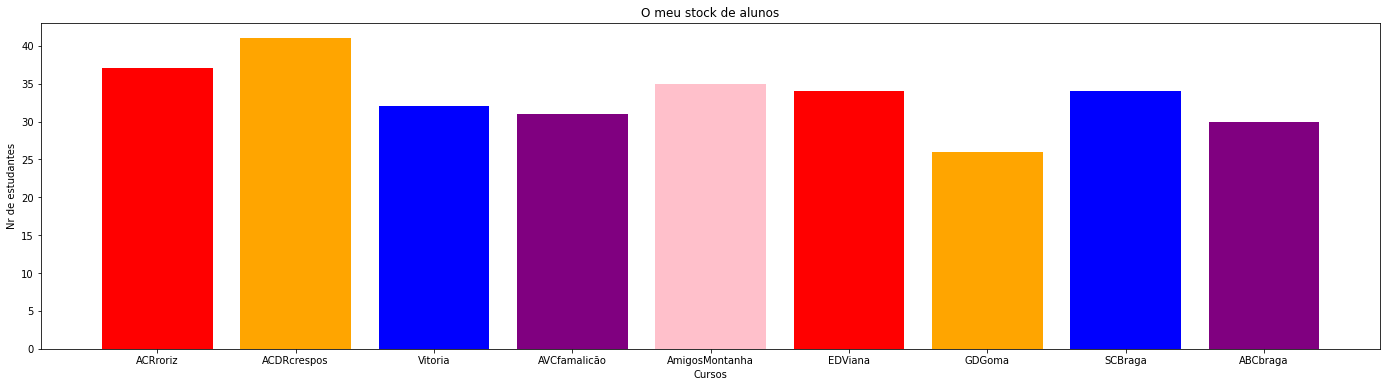

In [31]:
import matplotlib.pyplot as plt

def plotDistribPorModalidade(dm):
    left = []
    k=dict.keys(dm)
    v=dict.values(dm)
    tick_label=[]
    height = []
    
    for l in range(0,len(dm)):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'orange', 'blue','purple', 'pink'])
 

    plt.xlabel('Cursos')

    plt.ylabel('Nr de estudantes')

    plt.title('O meu stock de alunos')
 

    plt.show()
plotDistribPorModalidade(distribclubes)

## Gráfico duma distribuição qualquer (exercício 9)

Especifica uma função que faz o plot dum gráfico com a distribuição passada como argumento.

Nota: Que parâmetros são necessários para ter uma função genérica que trace o gráfico para qualquer distribuição?


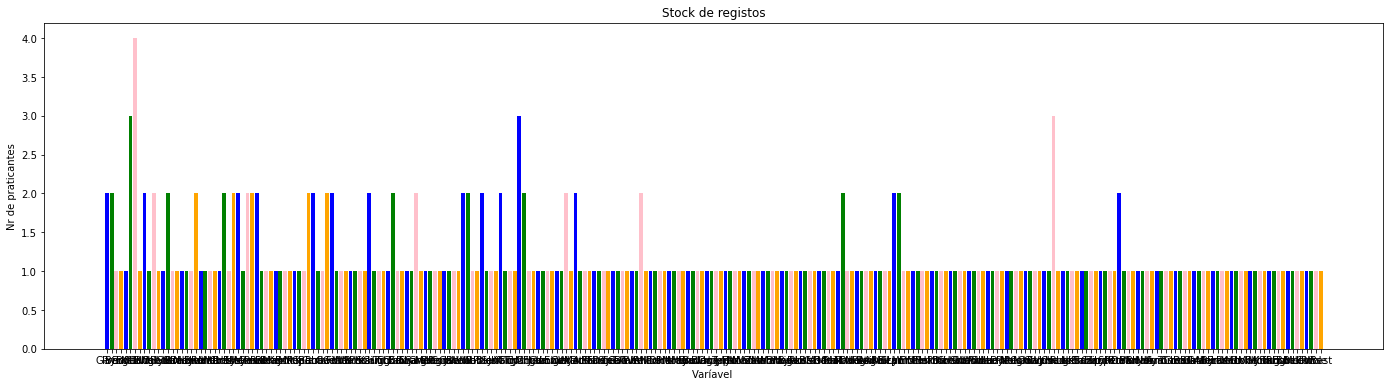

In [40]:
import matplotlib.pyplot as plt
def plotDistrib(bd,n):
    d={}
    
    if n == 2:
        for e in bd:
            if e[2][0:4] in dict.keys(d):
                d[e[2][0:4]] += 1
            else:
                d[e[2][0:4]] = 1
    else:
        for e in bd:
            if e[n] in dict.keys(d):
                d[e[n]] += 1
            else:
                d[e[n]] = 1
    
    left = []
    k=dict.keys(d)
    v=dict.values(d)
    tick_label=[]
    height = []
    
    for l in range(0,len(d)):
        left.append(l)
        
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    #print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Varíavel ')

    plt.ylabel('Nr de praticantes')

    plt.title('Stock de registos')
 

    plt.show()
plotDistrib(BD,2)

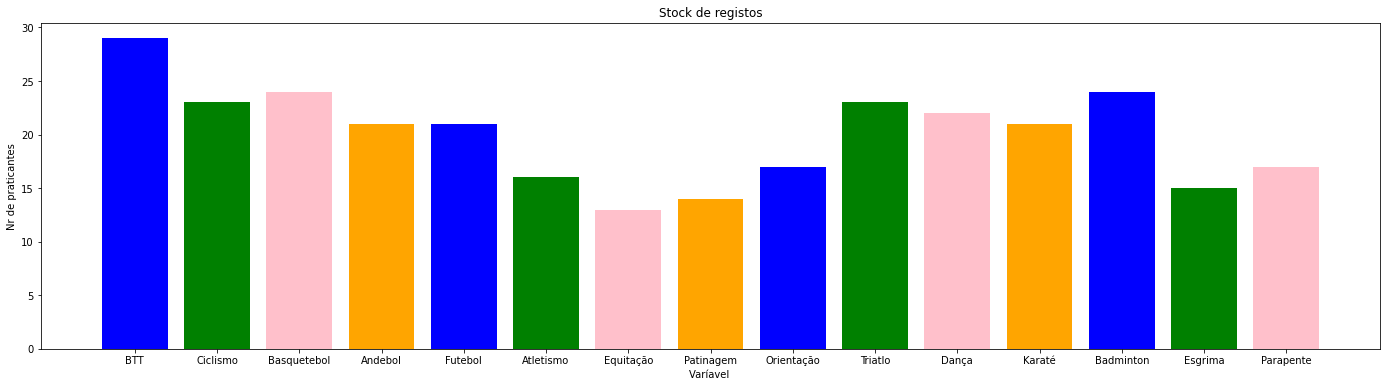

In [37]:
import PySimpleGUI as sg
bd=[]
BD = lerDataset("emd.csv")
bd=BD
imp=[]

def jErro(mensagem):
    layout=[[sg.Text(mensagem)], [sg.Button("Sair")]]
    window= sg.Window(title="Mesagem de erro", font="Arial 20", default_element_size=(15,1)).Layout(layout)

    stop=False  
    while not stop:
        event, values = window.read()
        if event == "Sair" or event == sg.WIN_CLOSED:
            stop = True

    window.close()


layout = [[sg.Column([
 
            [sg.Button("Modalidades")],
            [sg.Button("Distribuição por Clube")],
            [sg.Button("Distribuição por Ano")],
            [sg.Button("Distribuição por Modalidades")],
            [sg.Button("Sair")]
            ]), 
            sg.Listbox(values=imp, size=(28,12), key='_imp')]]



window = sg.Window("Aplicação",font="Arial 17").Layout(layout)
stop = False

while not stop:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Sair":
        stop = True
    elif event=="Modalidades":
        if len(bd)==0:              #caso o tamanho da bd seja 0, signifca que nenhuma bd foi inserida
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            for elem in modalidades(bd):             
                imp.append(elem)
            window.find_element('_imp').Update(values=imp)
            imp=[]


    elif event=="Distribuição por Ano":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,2)
            ano=distribPorAno(bd)
            for c in ano.keys():
                imp.append(c +" - " +str(ano[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]

    elif event=="Distribuição por Clube":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,7)
            clube=distribPorClube(bd)
            for c in clube.keys():
                imp.append(c +" - " +str(clube[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]

    elif event=="Distribuição por Modalidades":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,6)
            modalidades=distribPorModalidade(bd)
            for c in modalidades.keys():
                imp.append(c +" - " +str(modalidades[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]
    
    else: 
        print(event + "\n")
        print(values)


        
window.close()

#O que está no gráfico é a distribuição por modalidades.